In [1]:
import pandas as pd   
import seaborn as sns 
import matplotlib.pyplot as plt  



In [2]:
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df=pd.read_csv(r'C:\Users\saurabh\Documents\Desktop\Weight-Height_ML\weight-height.csv')
#df['Height']=(df['Height'])*0.454
df['Weight']=(df['Weight'])*0.454

FileNotFoundError: [Errno 2] File C:\Users\saurabh\Documents\Desktop\Weight-Height_ML\weight-height.csv does not exist: 'C:\\Users\\saurabh\\Documents\\Desktop\\Weight-Height_ML\\weight-height.csv'

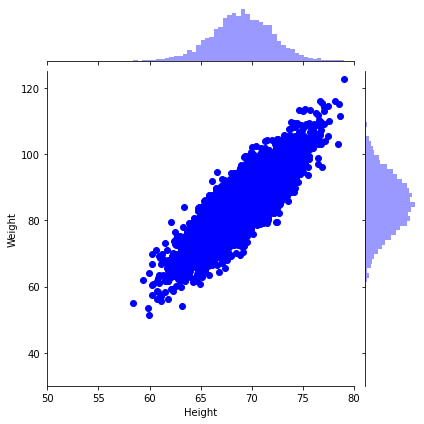

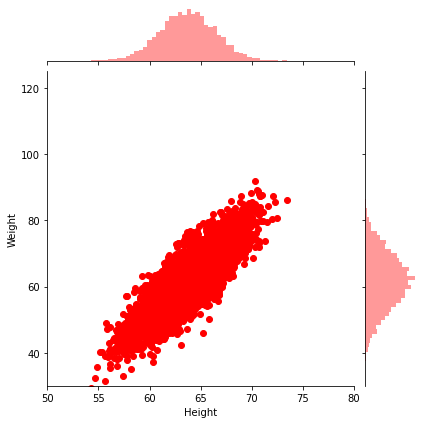

In [6]:
sns.jointplot('Height','Weight',df[df['Gender']=='Male'],kind='scatter',xlim=(50,80),ylim=(30,125),color='blue')

sns.jointplot('Height','Weight',df[df['Gender']=='Female'],kind='scatter',xlim=(50,80),ylim=(30,125),color='red')

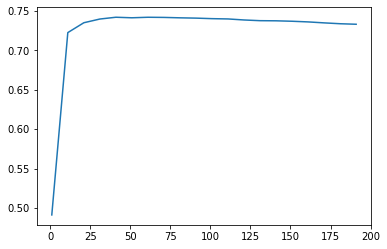

In [17]:
import numpy as np
df1=df[df['Gender']=='Male']
###should be array of list of feature/features
X=[[df1.iloc[i]['Height']] for i in range(len(df1))]
y=[[df1.iloc[i]['Weight']] for i in range(0,len(df1))]
X=np.array(X)
y=np.array(y)

X_train=X[:3000]
X_test=X[3001:]
y_train=y[:3000]
y_test=y[3001:]

score=[]
for i in range(1,200,10):
    knnreg=KNeighborsRegressor(n_neighbors=i).fit(X_train,y_train)
    score.append(knnreg.score(X_test,y_test))
plt.plot(range(1,200,10),score)
plt.show()

In [19]:
knnreg1=KNeighborsRegressor(n_neighbors=50).fit(X_train,y_train)
knnreg1.score(X_test,y_test)

0.7410481194892313

In [9]:
knnreg.predict([[67]])

array([[80.0077251]])

In [12]:
LinReg=LinearRegression().fit(X_train,y_train)
LinReg.score(X_test,y_test)

0.750408114384167

In [35]:
poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X)
X_train_poly=X_poly[:3000]
X_test_poly=X_poly[3001:]
LinPoly=LinearRegression().fit(X_train_poly,y_train)
LinPoly.score(X_test_poly,y_test)

0.7510939536615577

In [31]:
ridge=Ridge(alpha=1).fit(X_train_poly,y_train)
ridge.score(X_test_poly,y_test)

0.7506618910451708